# datafram 
dataframe的行 是一个数据字典，dataframe的列是一个数组


## axis
    - axis=0: 一行一行推进（沿垂直方向“聚合”或“过滤”）
        df.sum(axis=0) 是针对每一列求和；
        df.drop(index, axis=0) 是去掉某一行数据；
    - axis=1: 一列一列推进（沿水平方向“聚合”或“过滤”）
        df.sum(axis=1) 是针对每一行求和；
        df.drop(col_name, axis=1) 是去掉某一列数据；

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

scores = np.random.randint(10, 100, (4, 3))
courses = ['语文', '数学', '英语']
ids = [11, 12, 13, 14]
df = pd.DataFrame(ids)
df

,0
0,11
1,12
2,13
3,14


In [2]:
df1 = pd.DataFrame(data=scores, columns=courses, index=ids)
df1

,语文,数学,英语
11,68,79,47
12,86,95,52
13,30,12,97
14,22,18,78


In [3]:
scores = {
    '学号': [1,2,3,4],
    '语文': [62, 72, 93, 88],
    '数学': [95, 65, 86, 66],
    '英语': [66, 75, 82, 69],
}
df2 = pd.DataFrame(data=scores, index=ids)
df2

,学号,语文,数学,英语
11,1,62,95,66
12,2,72,65,75
13,3,93,86,82
14,4,88,66,69


In [4]:
df2.iloc[1,0]

2

In [5]:
df2.loc[11]

学号     1
语文    62
数学    95
英语    66
Name: 11, dtype: int64

In [6]:
df2['语文']

11    62
12    72
13    93
14    88
Name: 语文, dtype: int64

In [7]:
df2[df2['语文']>70]

,学号,语文,数学,英语
12,2,72,65,75
13,3,93,86,82
14,4,88,66,69


In [8]:
df2.mean(axis=0)

学号     2.50
语文    78.75
数学    78.00
英语    73.00
dtype: float64

In [9]:
df2.mean(axis=1)

11    56.00
12    53.50
13    66.00
14    56.75
dtype: float64

In [10]:
df2.describe()

,学号,语文,数学,英语
count,4.000000,4.000000,4.000000,4.000000
mean,2.500000,78.750000,78.000000,73.000000
std,1.290994,14.314911,14.899664,7.071068
min,1.000000,62.000000,65.000000,66.000000
25%,1.750000,69.500000,65.750000,68.250000
50%,2.500000,80.000000,76.000000,72.000000
75%,3.250000,89.250000,88.250000,76.750000
max,4.000000,93.000000,95.000000,82.000000


### 如何统计出dataframe中 A数据在一定范围内时，对应B数据的总和

In [11]:
# 创建一个包含两列数据的DataFrame
df = pd.DataFrame({'A': [1, 5, 8, 12, 16], 'B': [10, 20, 30, 40, 50]})

# 定义一个函数，用于统计指定范围内'B'列数据的总和
def sum_by_range(df, min_value, max_value):
    df_filtered = df[(df['A'] >= min_value) & (df['A'] <= max_value)]
    total_sum = df_filtered['B'].sum()
    return total_sum

# 统计'A'列数值在0到10之间的数据对应'B'列数据的总和
total_sum_0_10 = sum_by_range(df, 0, 10)
print(total_sum_0_10)

# 统计'A'列数值在5到8之间的数据对应'B'列数据的总和
total_sum_5_8 = sum_by_range(df, 5, 8)
total_sum_5_8

60


50

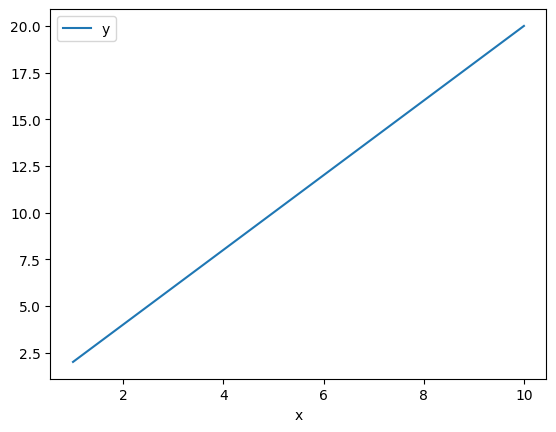

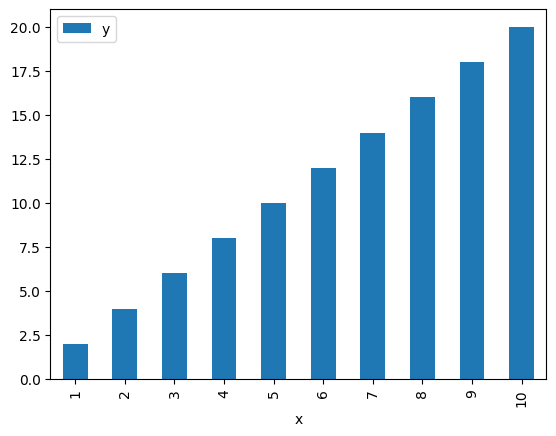

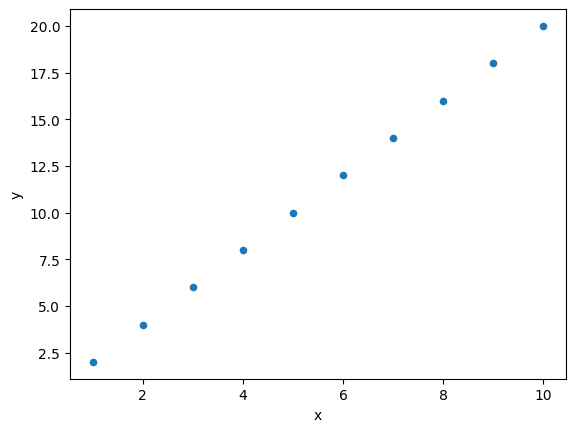

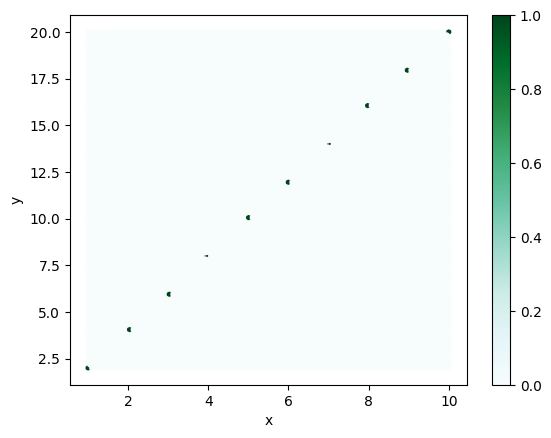

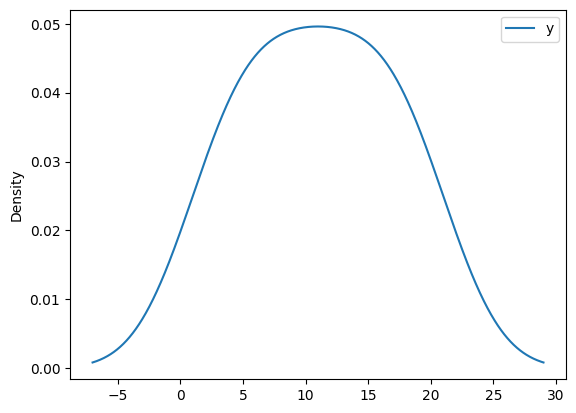

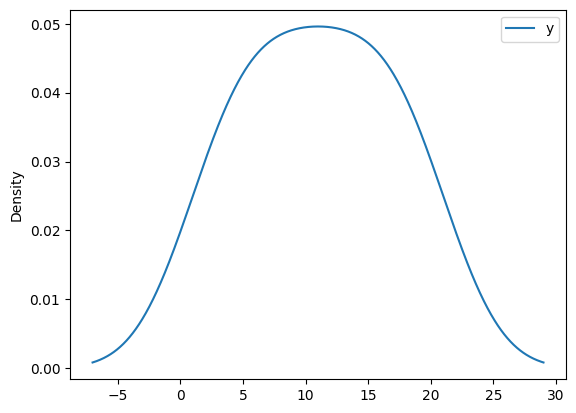

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例 DataFrame
df = pd.DataFrame({
   'x': range(1, 11),
   'y': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
})

# 绘制不同种类的图形
df.plot(x='x', y='y', kind='line')
df.plot(x='x', y='y', kind='bar')
df.plot(x='x', y='y', kind='scatter')
df.plot(x='x', y='y', kind='hexbin')
df.plot(x='x', y='y', kind='kde')
df.plot(x='x', y='y', kind='density')

# 显示图形
plt.show()
